1203.2165, see eq. 6

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
def pxpypzm_to_ptetaphi(fourp):
    #from px, py, pz, m to pt, eta, phi
    px, py, pz, m = fourp[:,0], fourp[:,1], fourp[:,2], fourp[:,3]
    p = np.sqrt(px**2 + py**2 + pz**2)
    theta = np.arccos(pz/p)
    eta = - np.log(np.tan(theta*0.5))
    pt = np.sqrt(px**2 + py**2)
    phi = np.arccos(px/pt) - np.pi*np.heaviside(-py, 0)
    return np.array([pt, eta, phi]).T

def ptetaphim_to_pxpypzm(fourp):
    #from pt, eta, phi, m to px, py, pz, m
    pt, eta, phi, m = fourp[:,0], fourp[:,1], fourp[:,2], fourp[:,3] 
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    p = pt * np.cosh(eta)
    en = np.sqrt(m**2 + p**2)
    return np.array([px, py, pz, m]).T

w_mass = 80.3692 # GeV

In [3]:
# data loading from single wrf reconstruction folder, where the calculation has already been done (W reconstruction and lepton boost)

W1_4p_ll = ptetaphim_to_pxpypzm(np.concatenate([np.load('../singlewrf_reconstruction/LL/W1_ptetaphi_ll.npy'), w_mass*np.ones((len(np.load('../singlewrf_reconstruction/LL/W1_ptetaphi_ll.npy')),1))], axis=1))
W2_4p_ll = ptetaphim_to_pxpypzm(np.concatenate([np.load('../singlewrf_reconstruction/LL/W2_ptetaphi_ll.npy'), w_mass*np.ones((len(np.load('../singlewrf_reconstruction/LL/W2_ptetaphi_ll.npy')),1))], axis=1))

W1_4p_tl = ptetaphim_to_pxpypzm(np.concatenate([np.load('../singlewrf_reconstruction/TL/W1_ptetaphi_tl.npy'), w_mass*np.ones((len(np.load('../singlewrf_reconstruction/TL/W1_ptetaphi_tl.npy')),1))], axis=1))
W2_4p_tl = ptetaphim_to_pxpypzm(np.concatenate([np.load('../singlewrf_reconstruction/TL/W2_ptetaphi_tl.npy'), w_mass*np.ones((len(np.load('../singlewrf_reconstruction/TL/W2_ptetaphi_tl.npy')),1))], axis=1))

W1_4p_tt = ptetaphim_to_pxpypzm(np.concatenate([np.load('../singlewrf_reconstruction/TT/W1_ptetaphi_tt.npy'), w_mass*np.ones((len(np.load('../singlewrf_reconstruction/TT/W1_ptetaphi_tt.npy')),1))], axis=1))
W2_4p_tt = ptetaphim_to_pxpypzm(np.concatenate([np.load('../singlewrf_reconstruction/TT/W2_ptetaphi_tt.npy'), w_mass*np.ones((len(np.load('../singlewrf_reconstruction/TT/W2_ptetaphi_tt.npy')),1))], axis=1))

b_lep1_4p_ll = np.load('../singlewrf_reconstruction/LL/boosted_nr_leps1_4p_ll.npy')
b_lep2_4p_ll = np.load('../singlewrf_reconstruction/LL/boosted_nr_leps2_4p_ll.npy')

b_lep1_4p_tl = np.load('../singlewrf_reconstruction/TL/boosted_nr_leps1_4p_tl.npy')
b_lep2_4p_tl = np.load('../singlewrf_reconstruction/TL/boosted_nr_leps2_4p_tl.npy')

b_lep1_4p_tt = np.load('../singlewrf_reconstruction/TT/boosted_nr_leps1_4p_tt.npy')
b_lep2_4p_tt = np.load('../singlewrf_reconstruction/TT/boosted_nr_leps2_4p_tt.npy')

In [4]:
# ids to tell if the lepton is electron or muon

lep_ids_data_ll = np.load('../../processed_ntuples/vanilla/LL/scalednorm/lep_ids_data_ll.npy')
lep_ids_dict_ll = {'pdgIdl1': lep_ids_data_ll.T[0,0], 'pdgIdl2': lep_ids_data_ll.T[0,1]}
df_ids_ll = pd.DataFrame(lep_ids_dict_ll)
ids_ll = df_ids_ll.to_numpy()

lep_ids_data_tl = np.load('../../processed_ntuples/vanilla/TL/scalednorm/lep_ids_data_tl.npy')
lep_ids_dict_tl = {'pdgIdl1': lep_ids_data_tl.T[0,0], 'pdgIdl2': lep_ids_data_tl.T[0,1]}
df_ids_tl = pd.DataFrame(lep_ids_dict_tl)
ids_tl = df_ids_tl.to_numpy()

lep_ids_data_tt = np.load('../../processed_ntuples/vanilla/TT/scalednorm/lep_ids_data_tt.npy')
lep_ids_dict_tt = {'pdgIdl1': lep_ids_data_tt.T[0,0], 'pdgIdl2': lep_ids_data_tt.T[0,1]}
df_ids_tt = pd.DataFrame(lep_ids_dict_tt)
ids_tt = df_ids_tt.to_numpy()

In [5]:
def cos_th(b_lep_4p, W_4p):
    # transverse helicity calculation
    b_lep_px = b_lep_4p[:,0]
    b_lep_py = b_lep_4p[:,1]
    b_lep_pt = list(zip(b_lep_px, b_lep_py))
    b_lep_pt_norm = np.sqrt(b_lep_px**2 + b_lep_py**2)
    W_px = W_4p[:,0]
    W_py = W_4p[:,1]
    W_pt = list(zip(W_px, W_py))
    W_pt_norm = np.sqrt(W_px**2 + W_py**2)
    num = np.einsum('ij, ij->i', b_lep_pt, W_pt)
    denom = b_lep_pt_norm * W_pt_norm
    res = num / denom
    return(res)

In [6]:
cos_th_1_ll = cos_th(b_lep1_4p_ll, W1_4p_ll)
cos_th_2_ll = cos_th(b_lep2_4p_ll, W2_4p_ll)

cos_th_1_tl = cos_th(b_lep1_4p_tl, W1_4p_tl)
cos_th_2_tl = cos_th(b_lep2_4p_tl, W2_4p_tl)

cos_th_1_tt = cos_th(b_lep1_4p_tt, W1_4p_tt)
cos_th_2_tt = cos_th(b_lep2_4p_tt, W2_4p_tt)

In [7]:
np.save('LL/transvhel_1_source_ll.npy', cos_th_1_ll)
np.save('LL/transvhel_2_source_ll.npy', cos_th_2_ll)

np.save('TL/transvhel_1_source_tl.npy', cos_th_1_tl)
np.save('TL/transvhel_2_source_tl.npy', cos_th_2_tl)

np.save('TT/transvhel_1_source_tt.npy', cos_th_1_tt)
np.save('TT/transvhel_2_source_tt.npy', cos_th_2_tt)

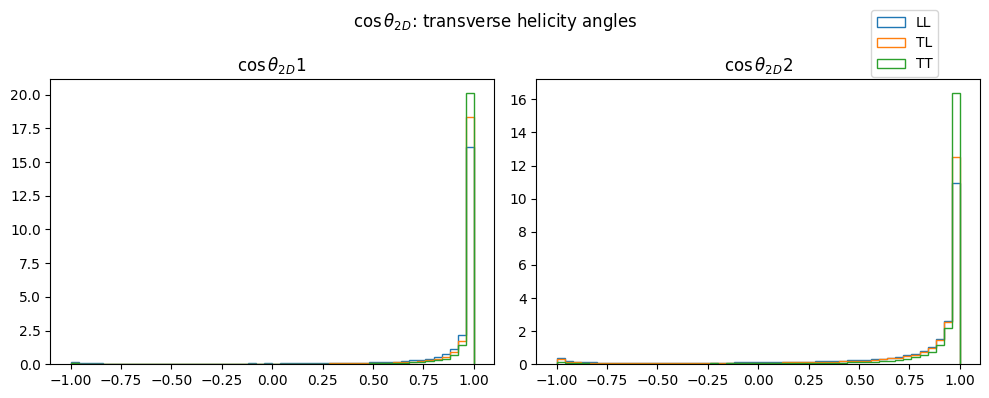

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
_, _, hist_ll = ax[0].hist(cos_th_1_ll, bins=50, density=True, histtype='step')
_, _, hist_tl = ax[0].hist(cos_th_1_tl, bins=50, density=True, histtype='step')
_, _, hist_tt = ax[0].hist(cos_th_1_tt, bins=50, density=True, histtype='step')
ax[0].set_title(f'$\cos\\theta_2$$_D$$1$')
ax[1].hist(cos_th_2_ll, bins=50, density=True, histtype='step')
ax[1].hist(cos_th_2_tl, bins=50, density=True, histtype='step')
ax[1].hist(cos_th_2_tt, bins=50, density=True, histtype='step')
ax[1].set_title(f'$\cos\\theta_2$$_D$$2$')
fig.suptitle(f'$\cos\\theta_2$$_D$: transverse helicity angles')
fig.legend([hist_ll[0], hist_tl[0], hist_tt[0]], ['LL', 'TL', 'TT'], loc="upper right", bbox_to_anchor=(0.95,1.))
plt.tight_layout()

In [9]:
#

Check if there is any difference between W+W+ and W-W- events

In [10]:
signWW_ll = np.where(ids_ll > 0., True, False)[:,0]
cos_th_1_ll_WpWp = cos_th_1_ll[signWW_ll]
cos_th_2_ll_WpWp = cos_th_2_ll[signWW_ll]
cos_th_1_ll_WmWm = cos_th_1_ll[np.invert(signWW_ll)]
cos_th_2_ll_WmWm = cos_th_2_ll[np.invert(signWW_ll)]

signWW_tl = np.where(ids_tl > 0., True, False)[:,0]
cos_th_1_tl_WpWp = cos_th_1_tl[signWW_tl]
cos_th_2_tl_WpWp = cos_th_2_tl[signWW_tl]
cos_th_1_tl_WmWm = cos_th_1_tl[np.invert(signWW_tl)]
cos_th_2_tl_WmWm = cos_th_2_tl[np.invert(signWW_tl)]

signWW_tt = np.where(ids_tt > 0., True, False)[:,0]
cos_th_1_tt_WpWp = cos_th_1_tt[signWW_tt]
cos_th_2_tt_WpWp = cos_th_2_tt[signWW_tt]
cos_th_1_tt_WmWm = cos_th_1_tt[np.invert(signWW_tt)]
cos_th_2_tt_WmWm = cos_th_2_tt[np.invert(signWW_tt)]

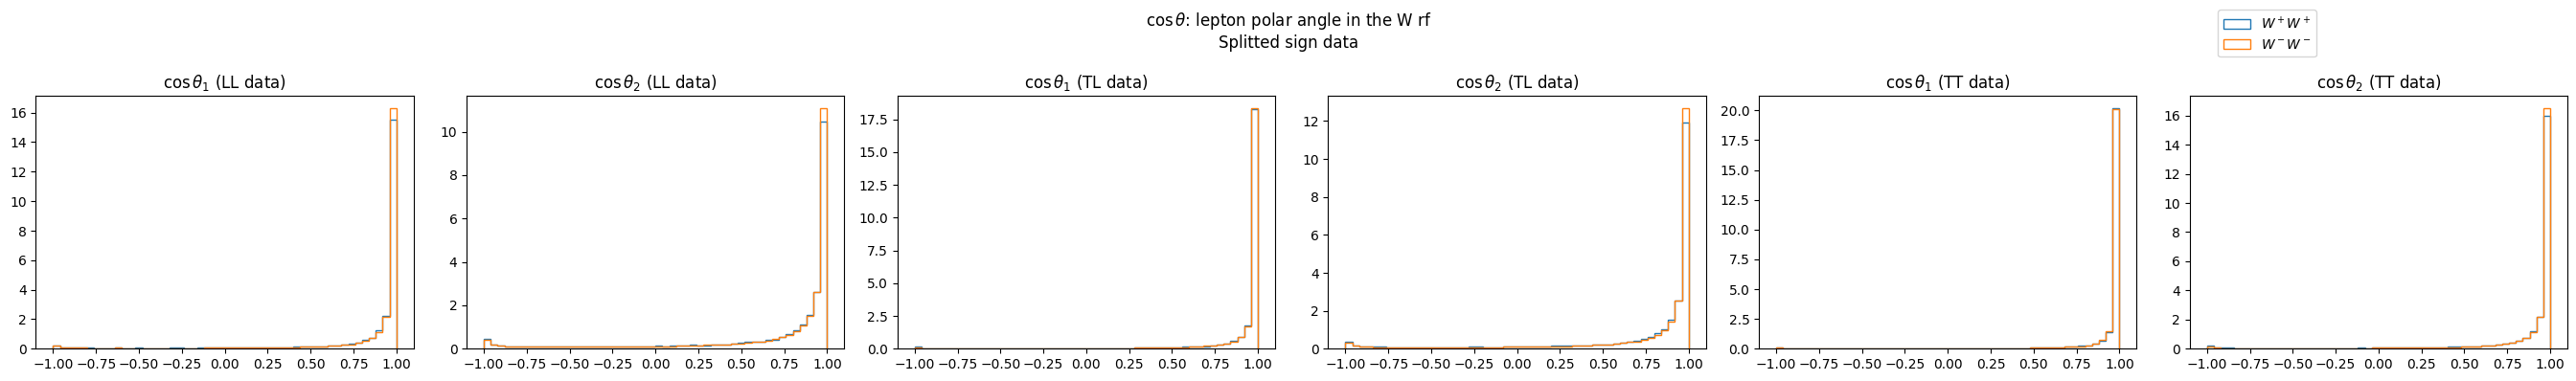

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(27,4))
_, _, hist_pp = ax[0].hist(cos_th_1_ll_WpWp, bins=50, density=True, histtype='step')
_, _, hist_mm = ax[0].hist(cos_th_1_ll_WmWm, bins=50, density=True, histtype='step')
ax[0].set_title(f'$\cos\\theta_1$ (LL data)')
ax[1].hist(cos_th_2_ll_WpWp, bins=50, density=True, histtype='step')
ax[1].hist(cos_th_2_ll_WmWm, bins=50, density=True, histtype='step')
ax[1].set_title(f'$\cos\\theta_2$ (LL data)')
ax[2].hist(cos_th_1_tl_WpWp, bins=50, density=True, histtype='step')
ax[2].hist(cos_th_1_tl_WmWm, bins=50, density=True, histtype='step')
ax[2].set_title(f'$\cos\\theta_1$ (TL data)')
ax[3].hist(cos_th_2_tl_WpWp, bins=50, density=True, histtype='step')
ax[3].hist(cos_th_2_tl_WmWm, bins=50, density=True, histtype='step')
ax[3].set_title(f'$\cos\\theta_2$ (TL data)')
ax[4].hist(cos_th_1_tt_WpWp, bins=50, density=True, histtype='step')
ax[4].hist(cos_th_1_tt_WmWm, bins=50, density=True, histtype='step')
ax[4].set_title(f'$\cos\\theta_1$ (TT data)')
ax[5].hist(cos_th_2_tt_WpWp, bins=50, density=True, histtype='step')
ax[5].hist(cos_th_2_tt_WmWm, bins=50, density=True, histtype='step')
ax[5].set_title(f'$\cos\\theta_2$ (TT data)')
fig.suptitle(f'$\cos\\theta$: lepton polar angle in the W rf\nSplitted sign data')
fig.legend([hist_pp[0], hist_mm[0]], [f'$W^+W^+$', f'$W^-W^-$'], loc="upper right", bbox_to_anchor=(0.9,1.))
plt.tight_layout()

In [12]:
#

Scaling

In [13]:
def logit(x, clip=1e-6):
    x = np.clip(x, a_min=clip, a_max=1-clip)
    return np.log(x/(1-x))

In [14]:
scaled_cos_th_1_ll = logit((cos_th_1_ll + 1.)/(2.), clip=1e-12)
scaled_cos_th_2_ll = logit((cos_th_2_ll + 1.)/(2.), clip=1e-12)

scaled_cos_th_1_tl = logit((cos_th_1_tl + 1.)/(2.), clip=1e-12)
scaled_cos_th_2_tl = logit((cos_th_2_tl + 1.)/(2.), clip=1e-12)

scaled_cos_th_1_tt = logit((cos_th_1_tt + 1.)/(2.), clip=1e-12)
scaled_cos_th_2_tt = logit((cos_th_2_tt + 1.)/(2.), clip=1e-12)

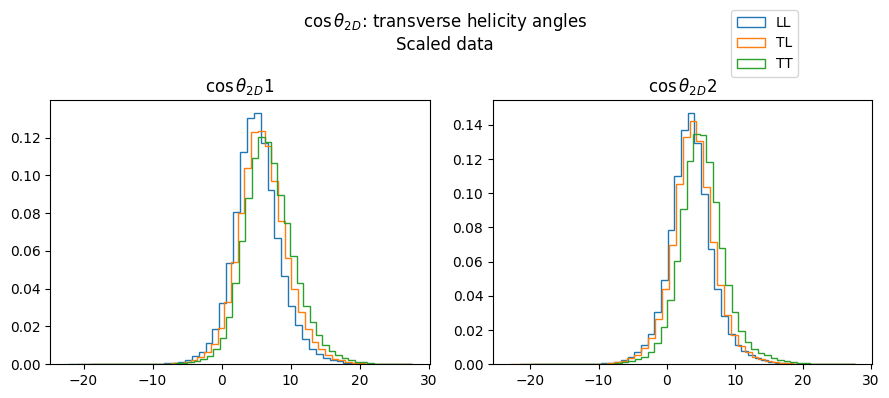

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
_, _, hist_ll = ax[0].hist(scaled_cos_th_1_ll, bins=50, density=True, histtype='step')
_, _, hist_tl = ax[0].hist(scaled_cos_th_1_tl, bins=50, density=True, histtype='step')
_, _, hist_tt = ax[0].hist(scaled_cos_th_1_tt, bins=50, density=True, histtype='step')
ax[0].set_title(f'$\cos\\theta_2$$_D$$1$')
ax[1].hist(scaled_cos_th_2_ll, bins=50, density=True, histtype='step')
ax[1].hist(scaled_cos_th_2_tl, bins=50, density=True, histtype='step')
ax[1].hist(scaled_cos_th_2_tt, bins=50, density=True, histtype='step')
ax[1].set_title(f'$\cos\\theta_2$$_D$$2$')
fig.suptitle(f'$\cos\\theta_2$$_D$: transverse helicity angles\nScaled data')
fig.legend([hist_ll[0], hist_tl[0], hist_tt[0]], ['LL', 'TL', 'TT'], loc="upper right", bbox_to_anchor=(0.9,1.))
plt.tight_layout()

In [16]:
#

In [17]:
def normalization(arr):
    arr_mean = np.mean(arr)*np.ones(len(arr))
    arr_std = np.std(arr)*np.ones(len(arr))
    fin = (arr - arr_mean) / arr_std
    return fin

In [18]:
scalednorm_cos_th_1_ll = normalization(scaled_cos_th_1_ll)
scalednorm_cos_th_2_ll = normalization(scaled_cos_th_2_ll)

scalednorm_cos_th_1_tl = normalization(scaled_cos_th_1_tl)
scalednorm_cos_th_2_tl = normalization(scaled_cos_th_2_tl)
scalednorm_cos_th_1_tl = normalization(scaled_cos_th_1_tl)
scalednorm_cos_th_2_tl = normalization(scaled_cos_th_2_tl)

scalednorm_cos_th_1_tt = normalization(scaled_cos_th_1_tt)
scalednorm_cos_th_2_tt = normalization(scaled_cos_th_2_tt)
scalednorm_cos_th_1_tt = normalization(scaled_cos_th_1_tt)
scalednorm_cos_th_2_tt = normalization(scaled_cos_th_2_tt)

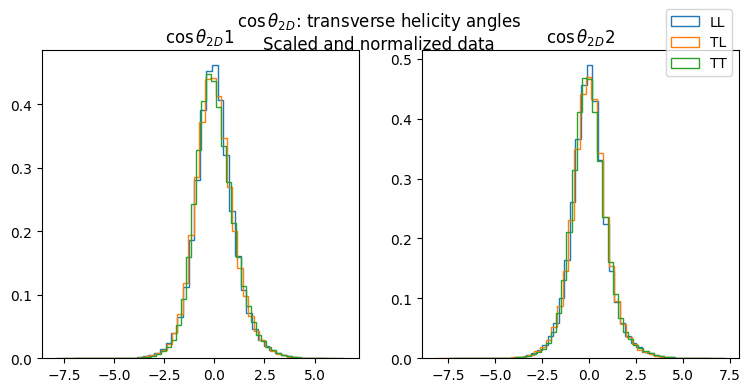

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
_, _, hist_ll = ax[0].hist(scalednorm_cos_th_1_ll, bins=50, density=True, histtype='step')
_, _, hist_tl = ax[0].hist(scalednorm_cos_th_1_tl, bins=50, density=True, histtype='step')
_, _, hist_tt = ax[0].hist(scalednorm_cos_th_1_tt, bins=50, density=True, histtype='step')
ax[0].set_title(f'$\cos\\theta_2$$_D$$1$')
ax[1].hist(scalednorm_cos_th_2_ll, bins=50, density=True, histtype='step')
ax[1].hist(scalednorm_cos_th_2_tl, bins=50, density=True, histtype='step')
ax[1].hist(scalednorm_cos_th_2_tt, bins=50, density=True, histtype='step')
ax[1].set_title(f'$\cos\\theta_2$$_D$$2$')
fig.suptitle(f'$\cos\\theta_2$$_D$: transverse helicity angles\nScaled and normalized data')
fig.legend([hist_ll[0], hist_tl[0], hist_tt[0]], ['LL', 'TL', 'TT'], loc="upper right", bbox_to_anchor=(0.9,1.))

In [20]:
np.save('LL/transvhel_1_ll.npy', scalednorm_cos_th_1_ll)
np.save('LL/transvhel_2_ll.npy', scalednorm_cos_th_2_ll)

np.save('TL/transvhel_1_tl.npy', scalednorm_cos_th_1_tl)
np.save('TL/transvhel_2_tl.npy', scalednorm_cos_th_2_tl)

np.save('TT/transvhel_1_tt.npy', scalednorm_cos_th_1_tt)
np.save('TT/transvhel_2_tt.npy', scalednorm_cos_th_2_tt)

In [21]:
#
np.save('transverse_helicity_source_LL.npy', np.stack([cos_th_1_ll, cos_th_2_ll]))
np.save('transverse_helicity_source_TX.npy', np.stack([np.concatenate([cos_th_1_tl, cos_th_1_tt]), np.concatenate([cos_th_2_tl, cos_th_2_tt])]))
np.save('transverse_helicity_LL.npy', np.stack([scalednorm_cos_th_1_ll, scalednorm_cos_th_2_ll]))
np.save('transverse_helicity_TX.npy', np.stack([np.concatenate([scalednorm_cos_th_1_tl, scalednorm_cos_th_1_tt]), np.concatenate([scalednorm_cos_th_2_tl, scalednorm_cos_th_2_tt])]))
#